In [ ]:
import os
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt

In [ ]:
image_csv_path = '/tf/0.DATA/train_image_level.csv'
study_csv_path = '/tf/0.DATA/train_study_level.csv'

In [ ]:
image_csv = pd.read_csv(image_csv_path)
study_csv = pd.read_csv(study_csv_path)

print(len(study_csv))
print(len(image_csv))

6054
6334


In [ ]:
study_csv.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


In [ ]:
image_csv.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [ ]:
study_csv.duplicated(['id'], keep=False).value_counts()

False    6054
dtype: int64

In [ ]:
image_csv.duplicated(['StudyInstanceUID'], keep=False).value_counts()

False    5822
True      512
dtype: int64

In [ ]:
# study의 id와 image의 studyinstanceuid가 매칭됨

In [ ]:
idx = np.random.randint(len(study_csv))

study_data = study_csv.iloc[idx]
query_st = study_data['id']
query_st = query_st.split('_')[0]

image_data = image_csv.query("StudyInstanceUID == @query_st")
image_name = image_data['id'].values[0].split('_')[0]

print(study_data)
print('====================================')
print(query_st)
print('====================================')
print(image_data)
print('====================================')
print(image_name)

id                          3bbcfe7bb63b_study
Negative for Pneumonia                       0
Typical Appearance                           1
Indeterminate Appearance                     0
Atypical Appearance                          0
Name: 1414, dtype: object
3bbcfe7bb63b
                      id                                              boxes  \
1521  3e1444e88d6a_image  [{'x': 388.98669, 'y': 1221.86667, 'width': 95...   

                                                  label StudyInstanceUID  
1521  opacity 1 388.98669 1221.86667 1340.18669 1983...     3bbcfe7bb63b  
3e1444e88d6a


In [ ]:
n = os.listdir('/tf/0.DATA/train/'+query_st)[0]

dicom_path = '/tf/0.DATA/train/' + query_st + '/' + n + '/' + image_name + '.dcm'
dcm = pydicom.dcmread(dicom_path)

In [ ]:
dcm

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.103777240732461648603395955748281466826
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: 03a65300fa41
(0008, 0018) SOP Instance UID                    UI: 3e1444e88d6a
(0008, 0020) Study Date                          DA: '8d2657d32869'
(0008, 0030) Study Time                          TM: '6abbc3914348'
(0008, 0050) Accession Number                    SH: '0a26341bf1ab'
(0008, 0060) Modality                            CS: 'CR'
(0010, 0010) Patient's Name                      PN: '940b245fb9cf'
(0010, 0020) 

In [ ]:
print(dcm.SOPInstanceUID) # image.csv의 id
print(dcm.StudyInstanceUID) # study.csv의 id

3e1444e88d6a
3bbcfe7bb63b


(2320, 2832)


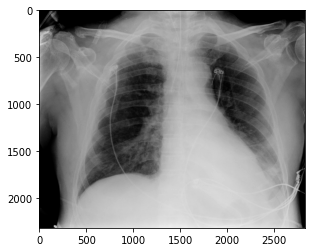

In [ ]:
image = dcm.pixel_array
plt.imshow(image, cmap='gray')
print(image.shape)

['opacity', '1', '388.98669', '1221.86667', '1340.18669', '1983.6000000000001', 'opacity', '1', '1730.72002', '1229.6', '2728.32014', '2118.93333']


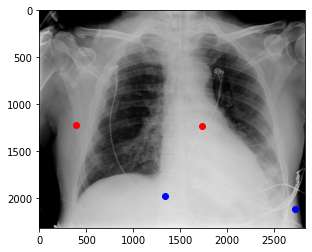

In [ ]:
plt.imshow(image, cmap='gray')

label = image_data['label'].values[0]
label = label.split(" ")
print(label)

for i in range(int(len(label) / 6)):
    x = float(label[i*6+2])
    y = float(label[i*6+3])
    dunno1 = float(label[i*6+4])
    dunno2 = float(label[i*6+5]    )
    
    plt.scatter(x, y, color='r')
    plt.scatter(dunno1, dunno2, color='b')

In [ ]:
if (study_data['Negative for Pneumonia']) == 1:
    print('negative')
else:
    print('positive')

positive


In [ ]:
## ====================================================================

In [ ]:
# negative / positive 비율 check

In [ ]:
study_csv.count()

id                          6054
Negative for Pneumonia      6054
Typical Appearance          6054
Indeterminate Appearance    6054
Atypical Appearance         6054
dtype: int64

In [ ]:
study_csv.isnull().sum()

id                          0
Negative for Pneumonia      0
Typical Appearance          0
Indeterminate Appearance    0
Atypical Appearance         0
dtype: int64

In [ ]:
study_csv.isna().sum()

id                          0
Negative for Pneumonia      0
Typical Appearance          0
Indeterminate Appearance    0
Atypical Appearance         0
dtype: int64

In [ ]:
study_csv.sum()

id                          00086460a852_study000c9c05fd14_study00292f8c37...
Negative for Pneumonia                                                   1676
Typical Appearance                                                       2855
Indeterminate Appearance                                                 1049
Atypical Appearance                                                       474
dtype: object

In [ ]:
study_csv['Negative for Pneumonia'].value_counts()
# 1 : nagetive
# 0 : positive

0    4378
1    1676
Name: Negative for Pneumonia, dtype: int64

In [ ]:
image_csv.count()

id                  6334
boxes               4294
label               6334
StudyInstanceUID    6334
dtype: int64

In [ ]:
image_csv.isnull().sum()

id                     0
boxes               2040
label                  0
StudyInstanceUID       0
dtype: int64

In [ ]:
'''
negative study : 1676 > image : 2040
positive study : 4378 > image : 4294

positive study 중 이미지는 negative로 분류되거나 그 반대 경우가 존재
study 중 이미지가 없는 경우도 존재할 듯
data imbalance
'''

'\nnegative study : 1676 > image : 2040\npositive study : 4378 > image : 4294\n\npositive study 중 이미지는 negative로 분류되거나 그 반대 경우가 존재\nstudy 중 이미지가 없는 경우도 존재할 듯\ndata imbalance\n'

In [ ]:
# positive study 중 이미지는 negative로 분류되었거나 negative study 중 positive image로 분류 된 경우 탐색

Sum = 0
for i in range(len(study_csv)):
    study_data = study_csv.iloc[i]
    
    query_st = study_data['id'].split('_')[0]
    image_data = image_csv.query("StudyInstanceUID == @query_st")
    
    study_status = bool(study_data['Negative for Pneumonia']) # 0 : positive, 1 : negative
    image_status = image_data['boxes'].isnull().values[0] # False ; positive, True : negative
    
    result = study_status ^ image_status # true : 두 파일에서 나온 분류 내용이 다르다 / False : 같다
    if result:
        Sum += 1
        print(study_data)
        print('-------------------------')
        print(image_data)
        break
#print(Sum)

id                          000c9c05fd14_study
Negative for Pneumonia                       0
Typical Appearance                           0
Indeterminate Appearance                     0
Atypical Appearance                          1
Name: 1, dtype: object
-------------------------
                      id boxes           label StudyInstanceUID
2010  51759b5579bc_image   NaN  none 1 0 0 1 1     000c9c05fd14


In [ ]:
# 잘못 분류된 이미지는 뺀다